In [1]:
#!conda activate tensorflow
import datetime
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("Reportes/Nuevos/datos_abiertos_covid19/COVID19_Mexico.csv", sep=',', index_col=0)
data.head(7)

,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
FECHA_ACTUALIZACION,,,,,,,,,,,,,,,,,,,,,
2020-05-09,19e443,2,2,28,2,28,28,38,1,2020-04-29,...,2,2,2,2,1,1,99,México,99,97
2020-05-09,18a39e,2,3,15,1,27,15,81,1,2020-03-30,...,2,2,2,2,2,1,99,México,99,97
2020-05-09,0bf23b,2,3,25,2,25,25,6,2,2020-03-31,...,2,2,2,1,2,1,99,México,99,2
2020-05-09,0909b0,2,3,27,2,27,27,4,1,2020-04-13,...,2,1,2,1,2,1,99,México,99,97
2020-05-09,1b0f7d,2,3,27,2,27,27,6,2,2020-04-16,...,2,2,2,2,1,1,99,México,99,1
2020-05-09,145be2,2,3,27,2,27,27,4,2,2020-04-19,...,2,2,2,2,1,1,99,México,99,2
2020-05-09,133d1f,2,3,15,2,9,15,58,1,2020-04-20,...,2,2,2,2,2,1,99,México,99,97


In [3]:
print(data.columns)
print(data.shape)
registers = data.shape[0]
print(registers)

Index(['ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM', 'SEXO', 'ENTIDAD_NAC',
       'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE', 'FECHA_INGRESO',
       'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA', 'EDAD',
       'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES', 'EPOC',
       'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR',
       'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'RESULTADO',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')
(128148, 34)
128148


In [4]:
data['FECHA_INGRESO'] = pd.to_datetime(data['FECHA_INGRESO'], format='%Y/%m/%d')
data['FECHA_SINTOMAS'] = pd.to_datetime(data['FECHA_SINTOMAS'], format='%Y/%m/%d')

data['STATUS'] = ["VIVO" if value=='9999-99-99' else "FALLECIDO" for value in data['FECHA_DEF']]

data['FECHA_DEF'] = data['FECHA_DEF'].replace('9999-99-99',np.NaN)
data['FECHA_DEF'] = pd.to_datetime(data['FECHA_DEF'], format='%Y/%m/%d')

#data['FECHA_DEF'].replace('9999-99-99',np.NaN)
#pd.to_datetime(data["FECHA_DEF"], format='%d/%m/%Y')
#data.isnull().any()
#data['FECHA_DEF'] = data['FECHA_DEF'] == '9999-99-99' ? '' : data['FECHA_DEF']

In [5]:
xl_file = pd.ExcelFile("Reportes/Nuevos/diccionario_datos_covid19/Catalogos_0412.xlsx")
dfs = {sheet_name: xl_file.parse(sheet_name) 
          for sheet_name in xl_file.sheet_names}

In [6]:
origen = dfs['Catálogo ORIGEN'].set_index('CLAVE').to_dict()['DESCRIPCIÓN']
sector = dfs['Catálogo SECTOR'].set_index('CLAVE').to_dict()['DESCRIPCIÓN']
sexo = dfs['Catálogo SEXO'].set_index('CLAVE').to_dict()['DESCRIPCIÓN']
tipo_paciente = dfs['Catálogo TIPO_PACIENTE'].set_index('CLAVE').to_dict()['DESCRIPCIÓN']
si_no = dfs['Catálogo SI_NO'].set_index('CLAVE').to_dict()['DESCRIPCIÓN']
nacionalidad = dfs['Catálogo NACIONALIDAD'].set_index('CLAVE').to_dict()['DESCRIPCIÓN']
resultado = dfs['Catálogo RESULTADO'][1:].set_index('Unnamed: 0').to_dict()['Unnamed: 1']
entidades = dfs['Catálogo de ENTIDADES'].set_index('CLAVE_ENTIDAD')['ABREVIATURA']
municipios = dfs['Catálogo MUNICIPIOS'].set_index(['CLAVE_ENTIDAD','CLAVE_MUNICIPIO']).to_dict()['MUNICIPIO']

In [7]:
#result = list(data[['ENTIDAD_RES','MUNICIPIO_RES']].to_records(index=False))

def replace_touple(df, col, dicc, colOut):
    salida = []
    salida = list()
    for key1, key2 in df[col]:
        if (key1,key2) in dicc:
            salida.append(dicc[(key1,key2)])
        else:
            salida.append(np.NaN)
       
    df[colOut] = salida

#tmp = [v in municipios for v in dataf['ENTIDAD_MUNICIPIO_RES']] 
#dataf.loc[tmp]

#dataf['ENTIDAD_MUNICIPIO_RES'].mask(dataf['ENTIDAD_MUNICIPIO_RES'] == (15,37), (1,1)), inplace=True)

In [8]:
dataf = data.copy()
dataf['ENTIDAD_MUNICIPIO_RES'] = list(zip(dataf['ENTIDAD_RES'], dataf['MUNICIPIO_RES']))
replace_touple(dataf, 'ENTIDAD_MUNICIPIO_RES', municipios, 'MUNICIPIO_RES')

dataf = dataf.replace({'ORIGEN': origen})
dataf = dataf.replace({'SECTOR': sector})
dataf = dataf.replace({'ENTIDAD_UM': entidades})
dataf = dataf.replace({'SEXO': sexo})
dataf = dataf.replace({'ENTIDAD_NAC': entidades})
dataf = dataf.replace({'ENTIDAD_RES': entidades})
dataf = dataf.replace({'TIPO_PACIENTE': tipo_paciente})
dataf = dataf.replace({'INTUBADO': si_no})
dataf = dataf.replace({'NEUMONIA': si_no})
dataf = dataf.replace({'NACIONALIDAD': nacionalidad})
dataf = dataf.replace({'EMBARAZO': si_no})
dataf = dataf.replace({'HABLA_LENGUA_INDI': si_no})
dataf = dataf.replace({'DIABETES': si_no})
dataf = dataf.replace({'EPOC': si_no})
dataf = dataf.replace({'ASMA': si_no})
dataf = dataf.replace({'INMUSUPR': si_no})
dataf = dataf.replace({'HIPERTENSION': si_no})
dataf = dataf.replace({'OTRA_CON': si_no})
dataf = dataf.replace({'CARDIOVASCULAR': si_no})
dataf = dataf.replace({'OBESIDAD': si_no})
dataf = dataf.replace({'RENAL_CRONICA': si_no})
dataf = dataf.replace({'TABAQUISMO': si_no})
dataf = dataf.replace({'OTRO_CASO': si_no})
dataf = dataf.replace({'RESULTADO': resultado})
dataf = dataf.replace({'MIGRANTE': si_no})
#dataf = dataf.replace({'PAIS_NACIONALIDAD': origen})
#dataf = dataf.replace({'PAIS_ORIGEN': origen})
dataf = dataf.replace({'UCI': si_no})

dataf['DIAS_INGRESO_SINTOMAS'] = (dataf['FECHA_INGRESO'] - dataf['FECHA_SINTOMAS']).dt.days
dataf['DIAS_SINTOMAS_DEF'] = (dataf['FECHA_DEF'] - dataf['FECHA_SINTOMAS']).dt.days

dataf.head()

,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,...,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,STATUS,ENTIDAD_MUNICIPIO_RES,DIAS_INGRESO_SINTOMAS,DIAS_SINTOMAS_DEF
FECHA_ACTUALIZACION,,,,,,,,,,,,,,,,,,,,,
2020-05-09,19e443,FUERA DE USMER,DIF,TS,HOMBRE,TS,TS,TAMPICO,AMBULATORIO,2020-04-29,...,SI,Positivo SARS-CoV-2,NO ESPECIFICADO,México,99,NO APLICA,VIVO,"(28, 38)",1,NaN
2020-05-09,18a39e,FUERA DE USMER,ESTATAL,MC,MUJER,TC,MC,TECÁMAC,AMBULATORIO,2020-03-30,...,NO,Positivo SARS-CoV-2,NO ESPECIFICADO,México,99,NO APLICA,VIVO,"(15, 81)",2,NaN
2020-05-09,0bf23b,FUERA DE USMER,ESTATAL,SL,HOMBRE,SL,SL,CULIACÁN,HOSPITALIZADO,2020-03-31,...,NO,Positivo SARS-CoV-2,NO ESPECIFICADO,México,99,NO,FALLECIDO,"(25, 6)",1,13.0
2020-05-09,0909b0,FUERA DE USMER,ESTATAL,TC,HOMBRE,TC,TC,CENTRO,AMBULATORIO,2020-04-13,...,NO,Positivo SARS-CoV-2,NO ESPECIFICADO,México,99,NO APLICA,VIVO,"(27, 4)",4,NaN
2020-05-09,1b0f7d,FUERA DE USMER,ESTATAL,TC,HOMBRE,TC,TC,CUNDUACÁN,HOSPITALIZADO,2020-04-16,...,SI,Positivo SARS-CoV-2,NO ESPECIFICADO,México,99,SI,FALLECIDO,"(27, 6)",8,16.0


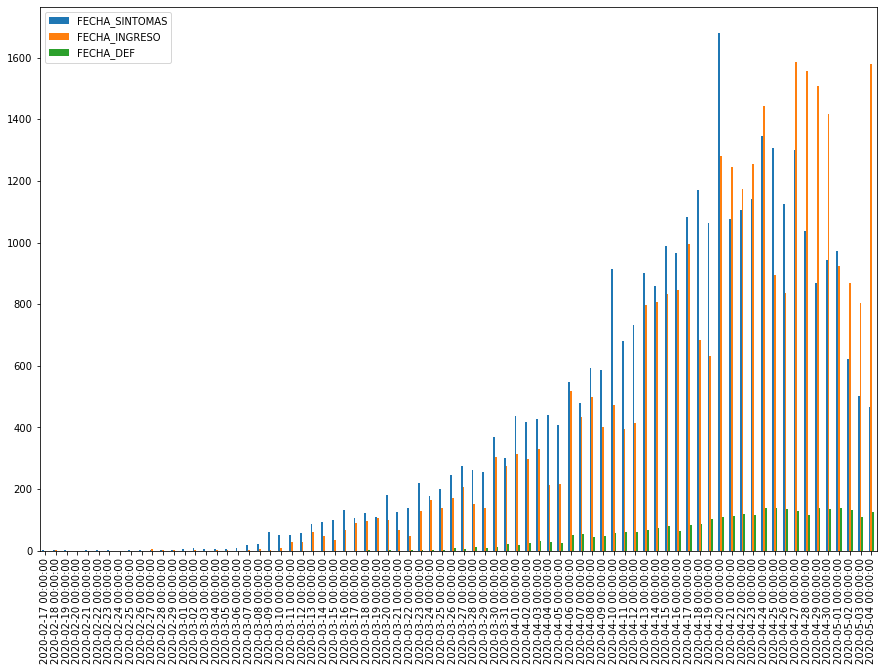

In [9]:
#print(dataf.columns)
dataq1 = dataf.query('RESULTADO =="Positivo SARS-CoV-2"')

fechas_serie = pd.date_range('20200217', periods=78, freq='D')
fechas_dataFrame = (fechas_serie.to_frame(name='Fecha'))

fechaSintomas = dataq1.groupby(['FECHA_SINTOMAS']).count()['DIAS_INGRESO_SINTOMAS'].to_frame(name='FECHA_SINTOMAS')
fechaIngreso = dataq1.groupby(['FECHA_INGRESO']).count()['DIAS_INGRESO_SINTOMAS'].to_frame(name='FECHA_INGRESO')
fechadef = dataq1.groupby(['FECHA_DEF']).count()['DIAS_SINTOMAS_DEF'].to_frame(name='FECHA_DEF')

fechas = fechas_dataFrame.join(fechaSintomas, lsuffix='si', rsuffix='_other')
fechas = fechas.join(fechaIngreso, lsuffix='_caller', rsuffix='_other')
fechas = fechas.join(fechadef, lsuffix='_caller', rsuffix='_other')

fechas = fechas.drop(['Fecha'], axis=1)

fechas.plot(kind='bar', figsize=(15,10))

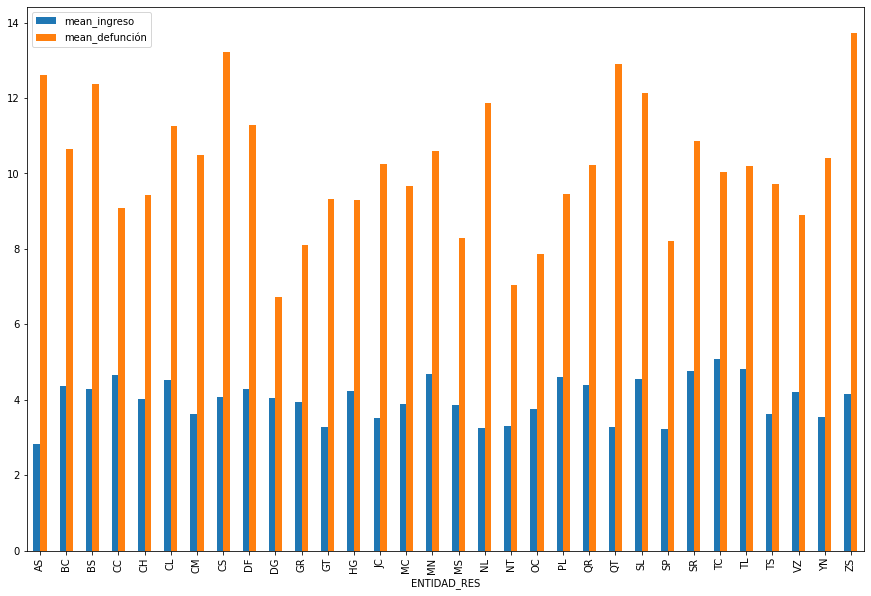

In [10]:
#print(dataf.columns)
dataq1 = dataf.query('RESULTADO =="Positivo SARS-CoV-2"')

#sintomas = dataq1.groupby(['ENTIDAD_RES']).sum()['DIAS_SINTOMAS_DEF'].to_frame(name='FECHA_SINTOMAS')
ingreso = dataq1.groupby(['ENTIDAD_RES'])['DIAS_INGRESO_SINTOMAS'].agg([np.mean]) #.agg([np.sum, pd.Series.count, np.mean, np.std])
defunciones = dataq1.groupby(['ENTIDAD_RES'])['DIAS_SINTOMAS_DEF'].agg([np.mean])

ingreso = ingreso.join(defunciones, lsuffix='_ingreso', rsuffix='_defunción')

ingreso.plot(kind='bar', figsize=(15,10))

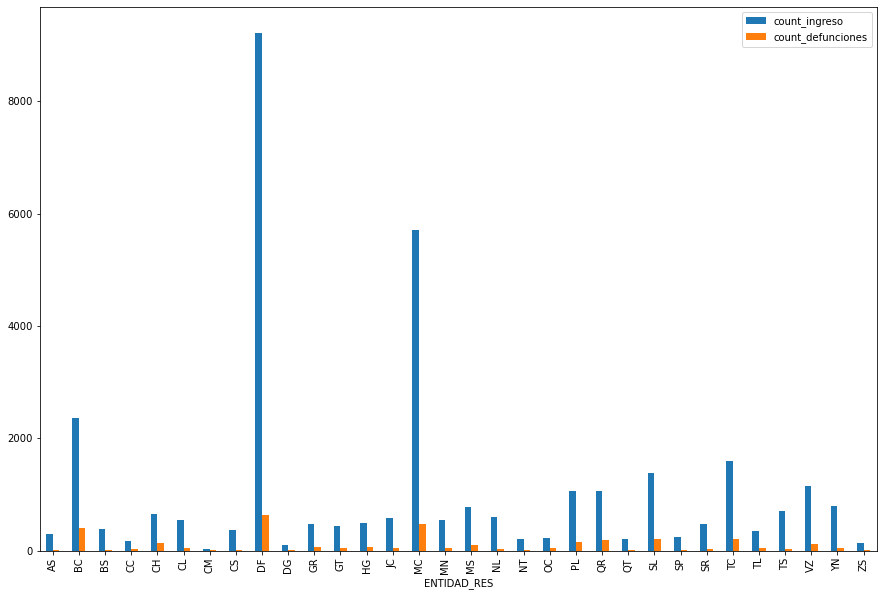

In [11]:
#print(dataf.columns)
#dataq1 = dataf.query('RESULTADO =="Positivo SARS-CoV-2" and ENTIDAD_UM == "DF"')
dataq1 = dataf.query('RESULTADO =="Positivo SARS-CoV-2"')

sintomas = dataq1.groupby(['ENTIDAD_RES'])['FECHA_INGRESO'].agg(['count'])
ingreso = dataq1.groupby(['ENTIDAD_RES'])['FECHA_SINTOMAS'].agg(['count']) #.agg([np.sum, pd.Series.count, np.mean, np.std])
defunciones = dataq1.groupby(['ENTIDAD_RES'])['FECHA_DEF'].agg(['count'])

#sintomas = sintomas.join(ingreso, lsuffix='_ingreso', rsuffix='_sintomas')
ingreso = ingreso.join(defunciones, lsuffix='_ingreso', rsuffix='_defunciones')

ingreso.plot(kind='bar', figsize=(15,10))

                                count              
TIPO_PACIENTE             AMBULATORIO HOSPITALIZADO
SECTOR          STATUS                             
CRUZ ROJA       FALLECIDO         1.0           NaN
ESTATAL         FALLECIDO         6.0          67.0
IMSS            FALLECIDO        92.0        1260.0
ISSSTE          FALLECIDO        15.0         229.0
MUNICIPAL       FALLECIDO         1.0           NaN
NO ESPECIFICADO FALLECIDO         2.0           9.0
PEMEX           FALLECIDO         7.0          46.0
PRIVADA         FALLECIDO        12.0          54.0
SEDENA          FALLECIDO         NaN           2.0
SEMAR           FALLECIDO         3.0           6.0
SSA             FALLECIDO       186.0        1340.0
UNIVERSITARIO   FALLECIDO         NaN          15.0


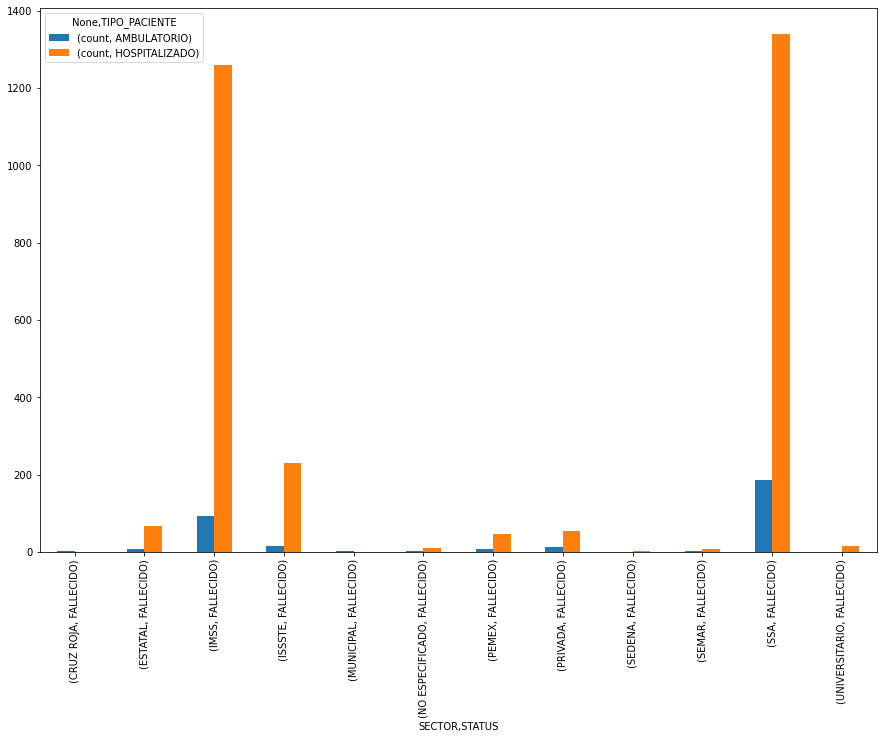

In [12]:
#print(dataf.columns)
#dataq1 = dataf.query('RESULTADO =="Positivo SARS-CoV-2" and ENTIDAD_UM == "JC" and STATUS == "FALLECIDO"')
dataq1 = dataf.query('RESULTADO =="Positivo SARS-CoV-2" and STATUS == "FALLECIDO"')
#dataq1 = dataf.query('RESULTADO =="Positivo SARS-CoV-2"')
dataq1 = dataq1[['SECTOR','ENTIDAD_UM','TIPO_PACIENTE','FECHA_INGRESO','FECHA_SINTOMAS','FECHA_DEF','STATUS']]

#dataq1 = dataq1.groupby(['ENTIDAD_RES','SECTOR'])['DIAS_INGRESO_SINTOMAS'].agg(['count']).unstack(1)

dataq1 = dataq1.groupby(['SECTOR','TIPO_PACIENTE','STATUS'])['ENTIDAD_UM'].agg(['count']).unstack(1)


print(dataq1)

dataq1.plot(kind='bar', figsize=(15,10))

                    ID_REGISTRO          ORIGEN SECTOR ENTIDAD_UM    SEXO  \
FECHA_ACTUALIZACION                                                         
2020-05-09               0f266d  FUERA DE USMER   IMSS         JC   MUJER   
2020-05-09               04c44e  FUERA DE USMER   IMSS         JC  HOMBRE   
2020-05-09               104a48  FUERA DE USMER   IMSS         JC   MUJER   
2020-05-09               08d93c  FUERA DE USMER   IMSS         JC  HOMBRE   
2020-05-09               0ac9fd  FUERA DE USMER   IMSS         JC   MUJER   
...                         ...             ...    ...        ...     ...   
2020-05-09               0c7981           USMER    SSA         JC  HOMBRE   
2020-05-09               0b948a           USMER    SSA         AS  HOMBRE   
2020-05-09               192091           USMER    SSA         JC  HOMBRE   
2020-05-09               171c2f           USMER    SSA         JC  HOMBRE   
2020-05-09               12da9c           USMER    SSA         JC  HOMBRE   

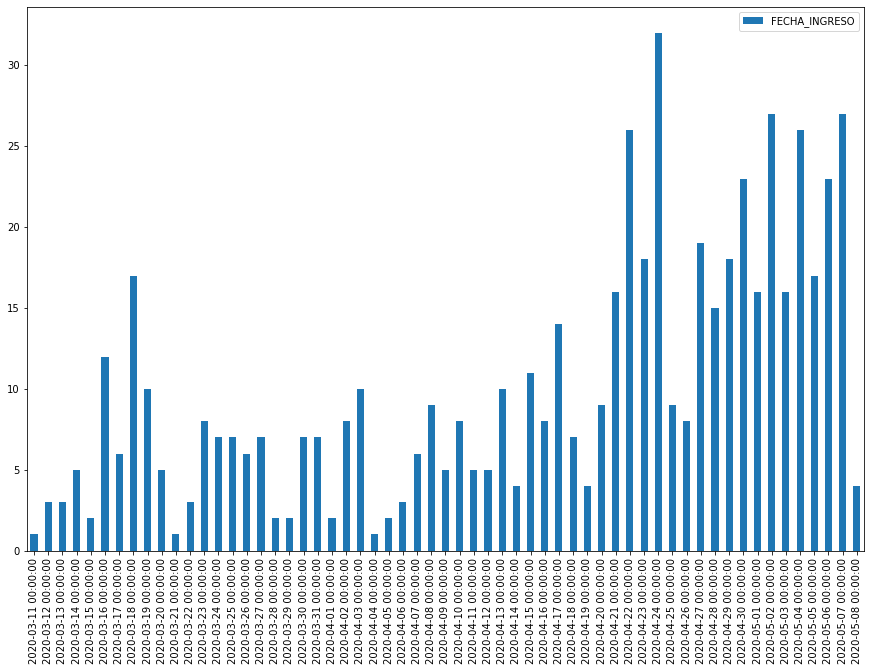

In [25]:
#print(dataf.columns)
#dataq1 = dataf.query('RESULTADO =="Positivo SARS-CoV-2"')
#dataq1 = dataq1[['SECTOR','ENTIDAD_UM','TIPO_PACIENTE','FECHA_INGRESO','FECHA_SINTOMAS','FECHA_DEF','STATUS']]

#dataq1 = dataq1.groupby(['ENTIDAD_RES','SECTOR'])['DIAS_INGRESO_SINTOMAS'].agg(['count']).unstack(1)

#dataq1 = dataq1.groupby(['FECHA_INGRESO'])['ENTIDAD_UM'].agg(['count']).unstack(1)

#print(dataq1.head())

#dataq1.plot(kind='bar', figsize=(15,10))

dataq1 = dataf.query('RESULTADO =="Positivo SARS-CoV-2" and ENTIDAD_RES == "JC"')

fechaSintomas = dataq1.groupby(['FECHA_SINTOMAS']).count()['DIAS_INGRESO_SINTOMAS'].to_frame(name='FECHA_SINTOMAS')
fechaIngreso = dataq1.groupby(['FECHA_INGRESO']).count()['DIAS_INGRESO_SINTOMAS'].to_frame(name='FECHA_INGRESO')
fechadef = dataq1.groupby(['FECHA_DEF']).count()['DIAS_SINTOMAS_DEF'].to_frame(name='FECHA_DEF')

#date_time_str = '20200217'
#date_time_obj = datetime.datetime.strptime(date_time_str, '%Y%m%d')

dias = (fechaIngreso.iloc[-1,:].name-fechaIngreso.iloc[0,:].name).days + 1

fechas_serie = pd.date_range(fechaIngreso.iloc[0,:].name, periods=dias, freq='D')
fechas_dataFrame = (fechas_serie.to_frame(name='Fecha'))

fechas = fechas_dataFrame.join(fechaIngreso, lsuffix='si', rsuffix='_other')
#fechas = fechas.join(fechaIngreso, lsuffix='_caller', rsuffix='_other')
#fechas = fechas.join(fechadef, lsuffix='_caller', rsuffix='_other')

fechas = fechas.drop(['Fecha'], axis=1)

fechas.plot(kind='bar', figsize=(15,10))

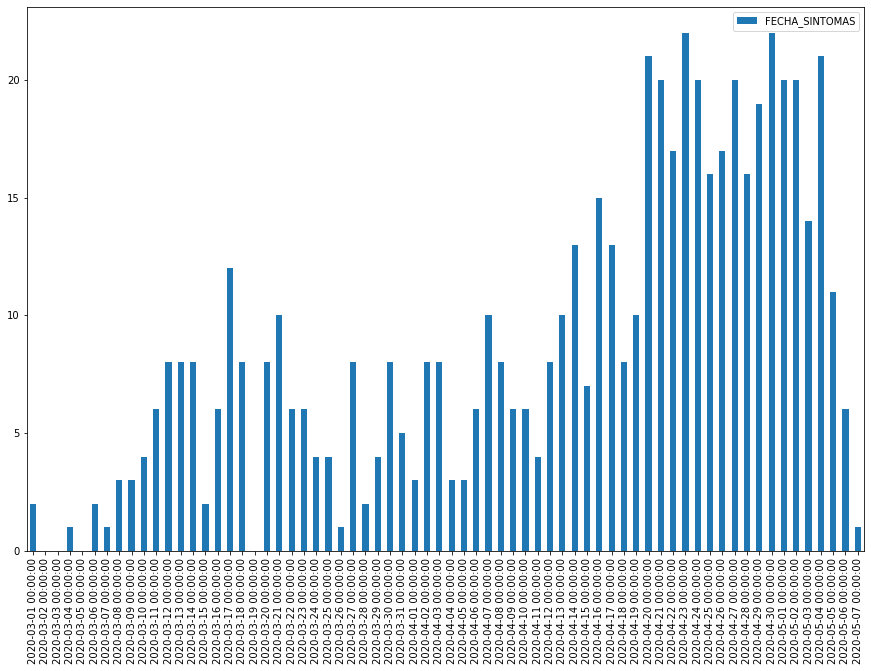

In [22]:
#print(dataf.columns)
#dataq1 = dataf.query('RESULTADO =="Positivo SARS-CoV-2" and ENTIDAD_UM == "JC"')
dataq1 = dataf.query('RESULTADO =="Positivo SARS-CoV-2" and ENTIDAD_RES == "JC"')

fechaSintomas = dataq1.groupby(['FECHA_SINTOMAS']).count()['DIAS_INGRESO_SINTOMAS'].to_frame(name='FECHA_SINTOMAS')
fechaIngreso = dataq1.groupby(['FECHA_INGRESO']).count()['DIAS_INGRESO_SINTOMAS'].to_frame(name='FECHA_INGRESO')
fechadef = dataq1.groupby(['FECHA_DEF']).count()['DIAS_SINTOMAS_DEF'].to_frame(name='FECHA_DEF')

#date_time_str = '20200217'
#date_time_obj = datetime.datetime.strptime(date_time_str, '%Y%m%d')

dias = (fechaSintomas.iloc[-1,:].name-fechaSintomas.iloc[0,:].name).days + 1

fechas_serie = pd.date_range(fechaSintomas.iloc[0,:].name, periods=dias, freq='D')
fechas_dataFrame = (fechas_serie.to_frame(name='Fecha'))


fechas = fechas_dataFrame.join(fechaSintomas, lsuffix='si', rsuffix='_other')
#fechas = fechas.join(fechaIngreso, lsuffix='_caller', rsuffix='_other')
#fechas = fechas.join(fechadef, lsuffix='_caller', rsuffix='_other')

fechas = fechas.drop(['Fecha'], axis=1)

fechas.plot(kind='bar', figsize=(15,10))

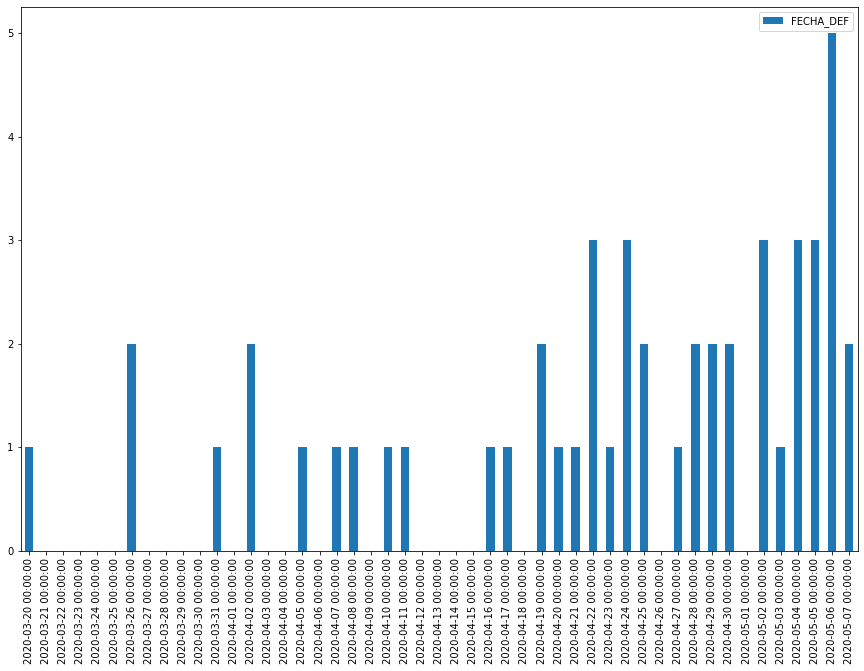

In [23]:
#print(dataf.columns)
dataq1 = dataf.query('RESULTADO =="Positivo SARS-CoV-2" and ENTIDAD_RES == "JC"')

fechaSintomas = dataq1.groupby(['FECHA_SINTOMAS']).count()['DIAS_INGRESO_SINTOMAS'].to_frame(name='FECHA_SINTOMAS')
fechaIngreso = dataq1.groupby(['FECHA_INGRESO']).count()['DIAS_INGRESO_SINTOMAS'].to_frame(name='FECHA_INGRESO')
fechadef = dataq1.groupby(['FECHA_DEF']).count()['DIAS_SINTOMAS_DEF'].to_frame(name='FECHA_DEF')

#date_time_str = '20200217'
#date_time_obj = datetime.datetime.strptime(date_time_str, '%Y%m%d')

dias = (fechadef.iloc[-1,:].name-fechadef.iloc[0,:].name).days + 1

fechas_serie = pd.date_range(fechadef.iloc[0,:].name, periods=dias, freq='D')
fechas_dataFrame = (fechas_serie.to_frame(name='Fecha'))


fechas = fechas_dataFrame.join(fechadef, lsuffix='si', rsuffix='_other')
#fechas = fechas.join(fechaIngreso, lsuffix='_caller', rsuffix='_other')
#fechas = fechas.join(fechadef, lsuffix='_caller', rsuffix='_other')

fechas = fechas.drop(['Fecha'], axis=1)

fechas.plot(kind='bar', figsize=(15,10))

In [16]:
#ingreso = ingreso.join(defunciones, lsuffix='_ingreso', rsuffix='_defunción')
#ingreso.plot(kind='bar', figsize=(15,10))

#ingreso.plot(kind='bar', figsize=(15,10))
#defunciones.plot(kind='bar', figsize=(15,10))

#fechas = fechas_dataFrame.join(fechaSintomas, lsuffix='si', rsuffix='_other')
#fechas = fechas.join(fechaIngreso, lsuffix='_caller', rsuffix='_other')
#fechas = fechas.join(fechadef, lsuffix='_caller', rsuffix='_other')

#fechas = fechas.drop(['Fecha'], axis=1)

#fechas.plot(kind='line', figsize=(15,10))

#print(dataq1[['ENTIDAD_RES','MUNICIPIO_RES','FECHA_SINTOMAS','FECHA_INGRESO','FECHA_DEF']])
#dataq1 = dataq1.groupby(['FECHA_SINTOMAS','ENTIDAD_RES'])['SEXO'].agg(['count']).unstack(1) 
#dataq1 = dataq1.groupby(['FECHA_SINTOMAS','ENTIDAD_RES'])['SEXO'].agg(['count']).unstack(1) 


#dataq1 = dataq1[['FECHA_INGRESO','FECHA_SINTOMAS','FECHA_DEF', 'DIAS_INGRESO_SINTOMAS','DIAS_SINTOMAS_DEF']]
#dataq1.head()

#print(dataq1.head(1))
#dataq1.plot(kind='line', figsize=(15,20))

#dataq1[['DIAS_INGRESO_SINTOMAS','DIAS_SINTOMAS_DEF']]
#dataq1 = dataq1.groupby(['FECHA_SINTOMAS','ENTIDAD_RES'])['SEXO'].agg(['count']).unstack(1)


#print(fechaSintomas)
#print(type(fechas))

#fechasIndex = pd.DatetimeIndex(fechas.values)
#df3=df.set_index(fechasIndex)
#print(type(df3))

#records = df.to_records(index=False)
#result = list(records)
#print(result)
#OUTPUT

dataq1 = dataf.query('RESULTADO =="Positivo SARS-CoV-2" and ENTIDAD_RES == "JC"')

fechas_serie = pd.date_range('20200217', periods=80, freq='D')
fechas_dataFrame = (fechas_serie.to_frame(name='Fecha'))

fechaSintomas = dataq1.groupby(['FECHA_SINTOMAS']).count()['DIAS_INGRESO_SINTOMAS'].to_frame(name='FECHA_SINTOMAS')
fechaIngreso = dataq1.groupby(['FECHA_INGRESO']).count()['DIAS_INGRESO_SINTOMAS'].to_frame(name='FECHA_INGRESO')
fechadef = dataq1.groupby(['FECHA_DEF']).count()['DIAS_SINTOMAS_DEF'].to_frame(name='FECHA_DEF')

fechas = fechas_dataFrame.join(fechaSintomas, lsuffix='si', rsuffix='_other')
fechas = fechas.join(fechaIngreso, lsuffix='_caller', rsuffix='_other')
fechas = fechas.join(fechadef, lsuffix='_caller', rsuffix='_other')

fechas = fechas.sum()

fechas

#fechas = fechas.drop(['Fecha'], axis=1)

#fechas.plot(kind='bar', figsize=(15,10))

FECHA_SINTOMAS    591.0
FECHA_INGRESO     561.0
FECHA_DEF          48.0
dtype: float64

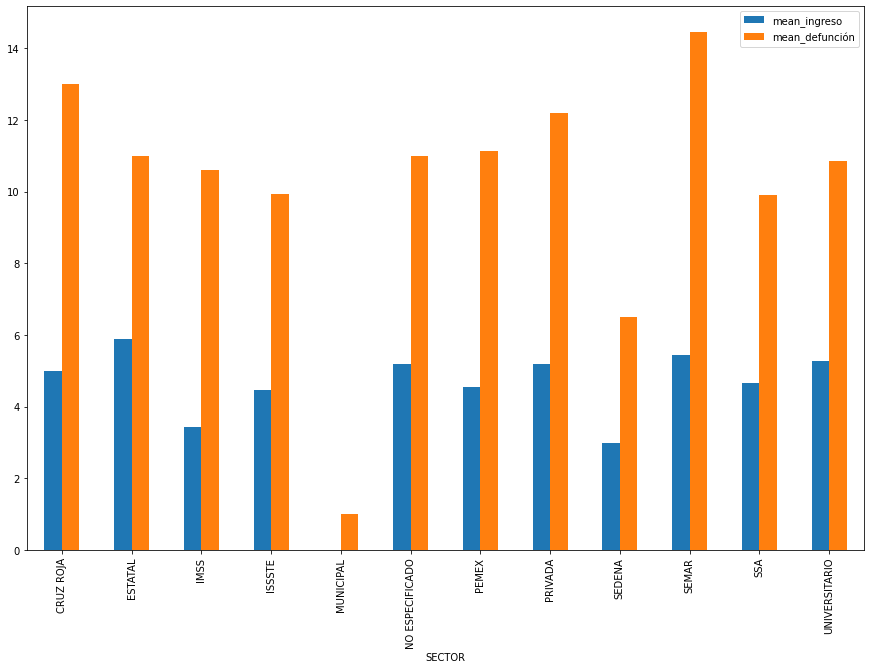

In [17]:
#print(dataf.columns)
dataq1 = dataf.query('RESULTADO =="Positivo SARS-CoV-2" and STATUS == "FALLECIDO"')

#sintomas = dataq1.groupby(['ENTIDAD_RES']).sum()['DIAS_SINTOMAS_DEF'].to_frame(name='FECHA_SINTOMAS')
ingreso = dataq1.groupby(['SECTOR'])['DIAS_INGRESO_SINTOMAS'].agg([np.mean]) #.agg([np.sum, pd.Series.count, np.mean, np.std])
defunciones = dataq1.groupby(['SECTOR'])['DIAS_SINTOMAS_DEF'].agg([np.mean])

ingreso = ingreso.join(defunciones, lsuffix='_ingreso', rsuffix='_defunción')

ingreso.plot(kind='bar', figsize=(15,10))